In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

import sklearn
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm

# Neural network libraries
import torch
import torchvision
import torch.utils.data as data_utils
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import random
import pickle
from sklearn.metrics import confusion_matrix

In [2]:
temp = np.load('/usr/workspace/UCM_2021/challenge_setup/data_and_information/asteroid_difference_images_0.npz')['data']

(3080, 3072)


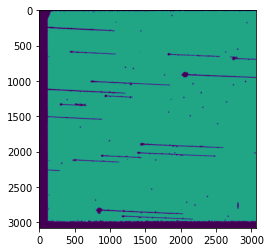

In [3]:
img=temp[90]
print(np.shape(img))
plt.imshow(img)
plt.savefig("./Figures/Asteroids_extra_samples.png",dpi=200)


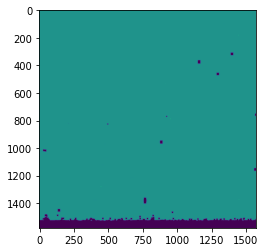

In [4]:
img=temp[2]
img=img[1500:,1500:]
plt.imshow(img)


In [5]:
sample_information_0 = np.load("/usr/workspace/UCM_2021/challenge_setup/data_and_information/asteroid_injected_information_0.npz",allow_pickle=True)

In [6]:
print(len(sample_information_0['data']))
sample_information_0['data'][3]

200


,magnitude,length,angle,box
0,16.461812,1,311.056328,"galsim.BoundsI(2617,2718,2925,3026)"
1,17.098770,2,9.289086,"galsim.BoundsI(2142,2244,303,405)"
2,16.819493,1,112.720041,"galsim.BoundsI(2247,2348,2368,2469)"
3,18.321860,1,310.031872,"galsim.BoundsI(848,949,845,946)"
4,16.410255,3,110.996219,"galsim.BoundsI(1335,1438,1138,1241)"
5,15.122469,2,8.977130,"galsim.BoundsI(2387,2489,2278,2380)"
6,18.601051,3,179.071790,"galsim.BoundsI(842,945,2175,2278)"
7,18.119146,1,234.742364,"galsim.BoundsI(1318,1419,125,226)"
8,18.646889,3,260.414486,"galsim.BoundsI(1808,1911,1832,1935)"
9,18.645245,1,338.521352,"galsim.BoundsI(2604,2705,1219,1320)"


In [7]:
sample_images_0=temp

In [8]:
np.shape(sample_images_0)

(100, 3080, 3072)

In [9]:
asteroid=[]
j=1
c=0
while j<100:
    print(j)
    for i in range(20):
        img=sample_images_0
        #print(j)
        box_values_ast_0 = sample_information_0['data'][j]['box'][i]
        temp_img_ast=sample_images_0[c][box_values_ast_0.ymin:box_values_ast_0.ymax,box_values_ast_0.xmin:box_values_ast_0.xmax]
        asteroid.append(temp_img_ast)
    j=j+2
    c=c+1

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99


[ -2.513656     1.441401     2.2338889    2.197241     0.66187245
   0.65323615   3.6049864   -3.174953    -1.8819925    0.9274077
  -6.142153    -0.13860402  -2.8196688    1.9416921    3.817347
   8.017556     0.26413155   1.1141213   -4.111591    -2.4272163
   3.4594717    1.4587177   -7.669863     1.657277    -0.8471422
  -2.4543102   -0.12327576 -13.003907    -3.71308      7.706674
  -0.65451974   3.341468     2.1445198   -3.2194932   -3.3287766
   6.5598536    0.4964476   -0.7420928   -0.7061417   -3.3805852
  -3.3451371   -2.3021982    2.2766864    3.1545177    1.0667475
  -3.250091    -1.9888726   -6.8901434   -8.338266    -5.279623
   0.46999806  11.496085     8.733929    -5.61155      3.1554205
   7.154275    -0.22036052  -4.2098145   -5.550095    -4.9245777
   6.7092037   -1.8867353   -3.9944727   -9.973546    -3.0268033
   5.162226     8.477247     6.4056783    0.39921468   3.3235664
   6.017171     1.0296203   -0.22363909   8.816825     4.496604
   0.6363926   -6.033574    

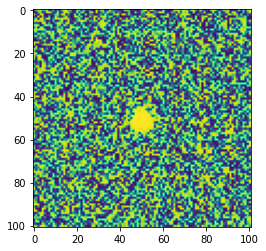

In [10]:
im=asteroid[999]
print(im[0])
print(np.max(im))
print(np.min(im))
plt.imshow(np.arctan(im))
plt.savefig("./Figures/Asteroid_Sample_3.png",dpi=200)


In [11]:
classes=["Asteroid","Non-Asteroid"]
Vectorized_Classes=[1,0]

In [12]:
fixed_size=[]
for i in asteroid:
    fixed_size.append(i[0:100,0:100])

fixed_size=np.arctan(fixed_size) #adding inverse tangent transform

In [13]:
np.shape(fixed_size)

(1000, 100, 100)

In [14]:
np.shape(fixed_size[1])

(100, 100)

In [15]:
j=1
c=0
non_asteroid=[]
total=0
while j<39:
    print(j)
    if(total==35000):
        break
    for i in range(20):
        temp_img_ast=sample_images_0[c]
        box_values_ast_0 = sample_information_0['data'][j]['box'][i]
        for x in range(290):
            for y in range(290):
                for box in range (20):
                    if(x<box_values_ast_0.xmin or x >box_values_ast_0.xmax and y <box_values_ast_0.ymin and y >box_values_ast_0.ymax):
                        break
                    if(box==19):
                        y_min=y*10
                        y_max=y_min+100
                        non_asteroid.append(temp_img_ast[(x)*10:(x+10)*10,y_min:y_max])
                        total=total+1
    j=j+2
    c=c+1
                        


1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37


In [16]:
np.shape(non_asteroid)


(741530, 100, 100)

In [17]:
temp_non_asteroid=random.sample(non_asteroid,1500)
temp_non_asteroid=np.arctan(temp_non_asteroid) #adding inverse tangent transform

In [18]:
np.shape(fixed_size)

(1000, 100, 100)

In [19]:
np.shape(temp_non_asteroid)

(1500, 100, 100)

In [20]:
x=[]
y=[]
for i in fixed_size:
    x.append(i)

for i in temp_non_asteroid:
    x.append(i)
for i in fixed_size:
    y.append(1)
for i in temp_non_asteroid:
    y.append(0)

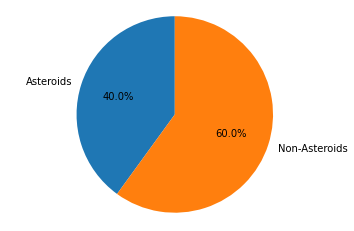

In [21]:
labels="Asteroids","Non-Asteroids"
sizes = [len(fixed_size),len(temp_non_asteroid)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig1.savefig("./Figures/Asteroid_PieChart.png",dpi=200)


In [22]:
print(len(fixed_size))
print(len(temp_non_asteroid))


1000
1500


0.9899343
-0.9894662
0.016534463
max value is 0.89385897
non_asteroid


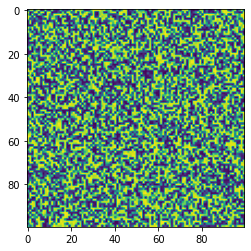

In [23]:
count=1001
img_info=x[count]
plt.imshow(img_info)
img_info=np.arctan(img_info)
print(np.max(img_info))
print(np.min(img_info))
print(np.mean(img_info))
print("max value is",img_info[50][51])
#plt.imshow(img_info) #

if(y[count]==1):
    print("asteroid")
else:
    print("non_asteroid")
plt.savefig("./Figures/Non_Asteroid_Samples5.png",dpi=200)

[91 91 70 66 72 91 19 61 42 28 23 98 36 85 95 19 24 70  8 39 37 83 56  0
 41 98 62 98 77 28 40 53 40 89 39 44 86 69 31 73  8 35 81 62 63 61 40  0
 71 24 48 83 50 71 47 21  4 51  6 12 79 24 19 67 58 97 34 78 43 44 72 16
 44 49 24 79 36 62 73 90 10 92 53 59 23 68 69 44 62 98 54 78 33  8 63 29
 57 24 50 42]


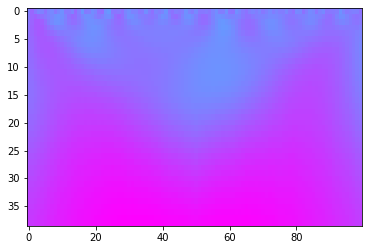

In [24]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 100, 100, endpoint=False)
sig  = np.random.randint(100, size=(1, 100))[0]
print(sig)
widths = np.arange(1,40)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, cmap='cool', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

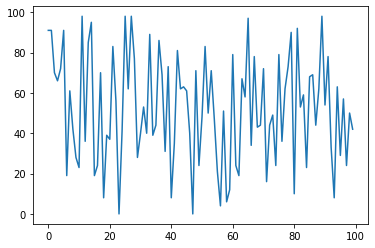

In [25]:
plt.plot(t,sig)

In [26]:
class Asteroid(Dataset):
    def __init__(self,X,Y):
        self.X1=X
        self.Y1=Y
    def __getitem__(self, idx):
        #idx=idx.item()
        tempX=self.X1[idx]
        tempX=torch.tensor(tempX)
        tempX=tempX.double()
        tempY=self.Y1[idx]
        if(tempY==1):
            tempY=torch.tensor([0,1])  
        else:
            tempY=torch.tensor([1,0])
            #(.2,.8)-[0]
            #(.2,.8)[0 1] [1 0]
            #
            #
        tempY=tempY.double()
        return(tempX,tempY)
       #returns batch(x,y)
    def __len__(self):
        return (len(self.X1))
        #Length


In [27]:
DataSet=Asteroid(x,y)

In [28]:
SizeOfDataSet=len(DataSet)

In [29]:
SizeOfDataSet

2500

In [30]:
trainSize=int(SizeOfDataSet*.7)
testSize=SizeOfDataSet-trainSize


In [31]:
trainSize+testSize

2500

In [32]:
train_dataset,val_dataset=torch.utils.data.random_split(DataSet,[int(trainSize),int(testSize)])

In [33]:
class Astroid_Classifer(torch.nn.Module):
    """
    Simple model which takes 32x32 inputs and produces
    score values for each of 10 classes for each element.
    Model adapted from:
    https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
    """
    def __init__(self):
        super().__init__()
        # Features
        self.conv1=nn.Conv2d(1,2,5)
        self.pool1=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(2,4,5)
        self.conv3=nn.Conv2d(32,64,5)
        self.fc1=nn.Linear(15488,130)#288/130
        self.fc2=nn.Linear(1936,80)#130/80
        self.fc3=nn.Linear(80,30)#80/30
        self.fc4=nn.Linear(30,2)#30/2

    def forward(self, x):
        #Batch
        """
        Pass one batch of image data through the model.
        Return batch of score values corresponding to each class.
        Input size: (batch_size, 1, 32, 32)
        Output size: (batch_size, 10)
        """
        x=self.pool1(F.relu(self.conv1(x)))
        x=self.pool1(F.relu(self.conv2(x)))
        x=torch.flatten(x,1)
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=(F.softmax(self.fc4(x)))  
        return x

In [34]:
model = Astroid_Classifer()


In [35]:
criterion=nn.MSELoss()
optimzer=optim.Adagrad(model.parameters(),lr=0.001)

In [36]:
accuracy=[]
loss_total=[]

In [37]:
arr=[]
for epoch in range(10):
    running_loss=float(0)
    count=0.0
    acc=0.0
#Batch size, Channels, WIDTH, Height
#1,1,100,100
    print("-------------TRAIN-------------")
    for i, (input_x, label) in enumerate(train_dataset):
        #print(outputs) 
        optimzer.zero_grad()
        input_x=input_x.float()#Conversion x64 tensor to float
        input_x = input_x.unsqueeze(0)
        input_x = input_x.unsqueeze(0)
        input_x.float()
        outputs=model(torch.tensor(input_x))#passes input tensor into model
        #print(outputs)
        count=count+1
        label_tensor=torch.max(label, 0)
        label_tensor=label_tensor[1]
        loss=criterion(outputs.float(),label.float())# [1,0],[1]
        if(torch.max(outputs, 1)[1]==label_tensor):
            acc=acc+1
            
        loss.backward()
        optimzer.step()
        running_loss+=loss.item()
        if i % 200==199:
            print('[%d,%5d] | loss: %.3f | accuracy: %.3f'%(epoch+1,i+1,running_loss/200,acc/count))
            accuracy.append(acc/count)
            loss_total.append(running_loss/count)
            count=0.0
            acc=0.0
            running_loss=0
            

-------------TRAIN-------------


/g/g15/nedwards/.conda/envs/group2/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()
/g/g15/nedwards/.conda/envs/group2/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/g/g15/nedwards/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1,  200] | loss: 0.241 | accuracy: 0.610
[1,  400] | loss: 0.241 | accuracy: 0.590
[1,  600] | loss: 0.239 | accuracy: 0.595
[1,  800] | loss: 0.243 | accuracy: 0.560
[1, 1000] | loss: 0.233 | accuracy: 0.605
[1, 1200] | loss: 0.233 | accuracy: 0.595
[1, 1400] | loss: 0.229 | accuracy: 0.610
[1, 1600] | loss: 0.218 | accuracy: 0.640
-------------TRAIN-------------
[2,  200] | loss: 0.217 | accuracy: 0.610
[2,  400] | loss: 0.217 | accuracy: 0.590
[2,  600] | loss: 0.211 | accuracy: 0.605
[2,  800] | loss: 0.213 | accuracy: 0.675
[2, 1000] | loss: 0.198 | accuracy: 0.665
[2, 1200] | loss: 0.192 | accuracy: 0.745
[2, 1400] | loss: 0.187 | accuracy: 0.755
[2, 1600] | loss: 0.170 | accuracy: 0.825
-------------TRAIN-------------
[3,  200] | loss: 0.158 | accuracy: 0.905
[3,  400] | loss: 0.146 | accuracy: 0.905
[3,  600] | loss: 0.137 | accuracy: 0.935
[3,  800] | loss: 0.140 | accuracy: 0.920
[3, 1000] | loss: 0.118 | accuracy: 0.930
[3, 1200] | loss: 0.107 | accuracy: 0.940
[3, 1400] | 

In [38]:
weight=model.state_dict()
path="Asteroid.pth.pth"
torch.save(weight, path)

In [46]:
correct = 0.0
total = 0.0
Actual=[]
Pred=[]
Wrong_images=[]
Gal=0.0
Star=0.0
Star_Count=0.0
Gal_Count=0.0
with torch.no_grad():
    for i, (input_x, label) in enumerate(val_dataset):
        #print(i)
        # calculate outputs by running images through the network
        holder=input_x
        input_x = input_x.unsqueeze(0)
        input_x = input_x.unsqueeze(0)
        outputs = model(input_x.float())
        #print(outputs)
        outputs=torch.max(outputs,0)
        #print(outputs[0])
        outputs=outputs[0]
        outputs=torch.max(outputs,0)
        outputs=outputs[1]
        outputs=outputs.item()
        #print(label)
        #print(outputs)
        #print(torch.max(label,0)[1])
        Actual.append((torch.max(label,0)[1]).item())
        Pred.append(outputs)
        if(outputs==0):
            Star_Count=Star_Count+1
        else:
             Gal_Count=Gal_Count+1
            
        if(outputs==(torch.max(label,0)[1]).item()):
            correct=correct+1
            if((torch.max(label,0)[1]).item()==0):
                Star=Star+1
            else:
                Gal=Gal+1
        else:
            Wrong_images.append([holder,(torch.max(label,0)[1]).item()])
            
        if i % 2000==1999:
            print("["+str(i)+"] : "+str(correct/total))
        total=total+1

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))
print("Accuracy of asteroid classification is %d %%"%(100*Star/Star_Count))
print("Accuracy of non-asteroid classification is %d %%"%(100*Gal/Gal_Count))

/g/g15/nedwards/.conda/envs/group2/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the network on the test images: 97 %
Accuracy of asteroid classification is 96 %
Accuracy of non-asteroid classification is 100 %


In [44]:
c=confusion_matrix(Actual, Pred)
df = pd.DataFrame(data=c)
df=df.rename(columns={0: "Prediction-Non-Asteroid", 1: "Prediction-Asteroid"})
df.rename(index={0: "Real-Non-Asteroid", 1: "Real-Asteroid"})

,Prediction-Non-Asteroid,Prediction-Asteroid
Real-Non-Asteroid,452,0
Real-Asteroid,17,281


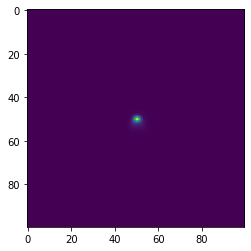

1


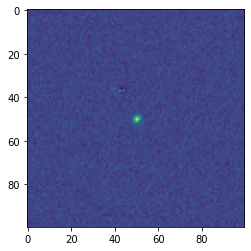

1


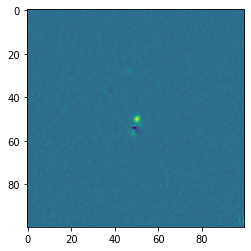

1


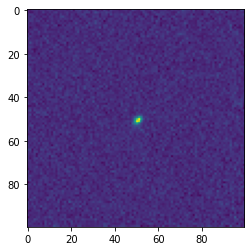

1


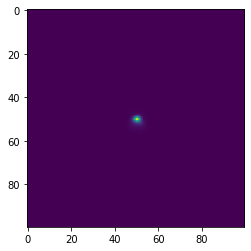

1


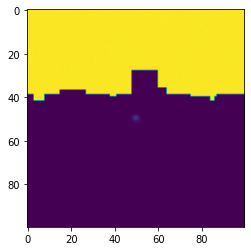

1


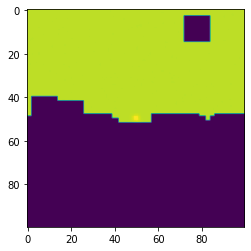

1


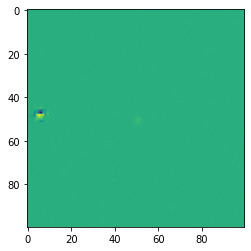

1


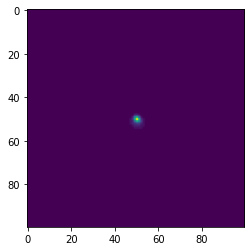

1


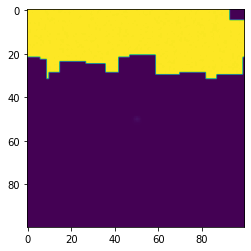

1


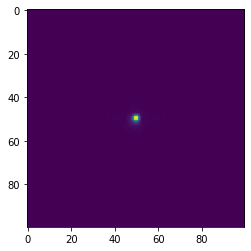

1


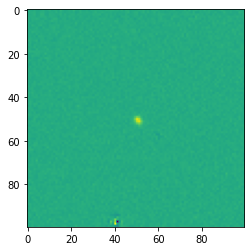

1


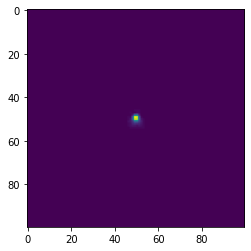

1


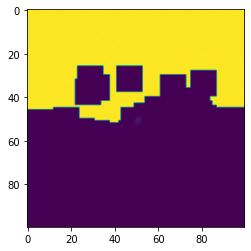

1


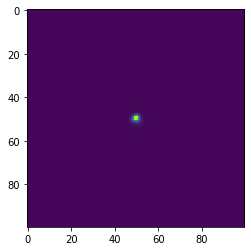

1


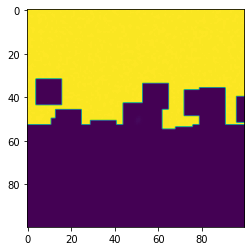

1


<Figure size 432x288 with 0 Axes>

In [62]:
for i in range(16):
    tempimg=Wrong_images[i][0]
    tempimg=tempimg.numpy()
    plt.imshow(np.tan(tempimg))
    plt.show()
    print(Wrong_images[i][1])
    plt.savefig("./Figures/Asteroid False Postive.png",dpi=200)